<h1>[Session5] 엄태림 회귀심화 클론코딩 및 마크다운</h1>

<h2>선형회귀 분석을 통한 예측</h2>

<h3>1. 단순 선형 회귀</h3>

독립 변수
- id : 고유한 id 값
- date : 집이 매각된 날자
- bedrooms : 침실 수
- bathrooms : 욕실 수
- sqft_living : 집의 평방 피트
- sqft_lot : 부지의 평방 피트
- floors : 집의 총 층수
- waterfront : 물가가 보이는 집
- condition : 상태가 얼마나 좋은지 여부
- grade : 주택에 부여되는 등급
- sqft_above : 지하실을 제외한 집의 평방 피트
- sqft_basement : 지하실의 평방 피트
- yr_built : 지어진 연도
- yr_renovated : 리모델링된 연도
- lat : 위도 좌표
- long : 경도 좌표
- sqft_living15 : 2015년 당시 거실 면적 (일부 개조를 의미하고, 부지 면적에 영향을 미칠 수도 있고 아닐 수도 있음)
- sqft_lot15 : 2015년 당시 부지 면적(일부 개조를 의미함)

종속 변수(y)
- price : 주택 가격

In [205]:
import numpy as mp
import pandas as pd

from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

import sklearn.linear_model
from sklearn.model_selection import train_test_split

from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [206]:
df = pd.read_csv('kc_house_data.csv')

df.index +=1
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
2,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
3,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
4,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
5,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21609,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21610,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21611,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21612,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


각 칼럼 별로 결측치가 있는지 여부와, 데이터타입, 그리고 기술통계값을 확인하기!

In [208]:
print(df.isnull().sum())
print('\n')
df.info()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 1 to 21613
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  i

결측치는 없고, 데이터타입은 위의 info()의 결과로 확인 가능


In [210]:
df_stats = df.describe()

df_stats

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


칼럼은 많고, 확인하고자하는 통계량이 적어, 열과 행을 전치시켜 저장하는듯 하다

전치시켜서 출력해보자


In [212]:
df_stats = df.describe().T
df_stats

,count,mean,std,min,25%,50%,75%,max
id,21613.0,4.580302e+09,2.876566e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21613.0,5.400881e+05,3.671272e+05,7.500000e+04,3.219500e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21613.0,3.370842e+00,9.300618e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21613.0,2.114757e+00,7.701632e-01,0.000000e+00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21613.0,2.079900e+03,9.184409e+02,2.900000e+02,1.427000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21613.0,1.510697e+04,4.142051e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068800e+04,1.651359e+06
floors,21613.0,1.494309e+00,5.399889e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21613.0,7.541757e-03,8.651720e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21613.0,2.343034e-01,7.663176e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21613.0,3.409430e+00,6.507430e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


여기에 중간값, 결측치, 왜도, 첨도도 표시하겠습니다

In [214]:
median_results = [] #중앙값 저장할 리스트
null_results = [] #결측치의 개수를 저장할 리스트
skew_results = [] #왜도 저장할 리스트
kurtosis_results = [] #첨도 저장할 리스트

for idx, val in enumerate(df_stats.index):
    median_results.append(df[val].median())
    skew_results.append(df[val].skew())
    kurtosis_results.append(df[val].kurtosis())
    null_results.append(df[val].isnull().sum())

df_stats['median'] = median_results
df_stats['missing'] = null_results
df_stats['skewness'] = skew_results
df_stats['kurtosis'] = kurtosis_results

df_stats


,count,mean,std,min,25%,50%,75%,max,median,missing,skewness,kurtosis
id,21613.0,4.580302e+09,2.876566e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09,3.904930e+09,0,0.243329,-1.260542
price,21613.0,5.400881e+05,3.671272e+05,7.500000e+04,3.219500e+05,4.500000e+05,6.450000e+05,7.700000e+06,4.500000e+05,0,4.024069,34.585540
bedrooms,21613.0,3.370842e+00,9.300618e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01,3.000000e+00,0,1.974300,49.063653
bathrooms,21613.0,2.114757e+00,7.701632e-01,0.000000e+00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00,2.250000e+00,0,0.511108,1.279902
sqft_living,21613.0,2.079900e+03,9.184409e+02,2.900000e+02,1.427000e+03,1.910000e+03,2.550000e+03,1.354000e+04,1.910000e+03,0,1.471555,5.243093
sqft_lot,21613.0,1.510697e+04,4.142051e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068800e+04,1.651359e+06,7.618000e+03,0,13.060019,285.077820
floors,21613.0,1.494309e+00,5.399889e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00,1.500000e+00,0,0.616177,-0.484723
waterfront,21613.0,7.541757e-03,8.651720e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0,11.385108,127.632494
view,21613.0,2.343034e-01,7.663176e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00,0.000000e+00,0,3.395750,10.893022
condition,21613.0,3.409430e+00,6.507430e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00,3.000000e+00,0,1.032805,0.525764


왜도가 양수면 양의 방향으로 치우친, 오른쪽 꼬리가 긴 경우고, 음수면 왼쪽으로 치우쳐 왼쪽 꼬리가 길다

거기에 절댓값 기준 0.5 언더면 거의 대칭이라고 보고, 0.5~1이면 약간, 1 이상이면 상당히 왜도있는 자료라고 합니다

위의 자료 중, 우리가 이번에 알고자 하는 price의 왜도가 4 이상으로, 굉장히 큰 수치를 보이는걸 알 수 있다

-> 자연로그를 활용해 분포를 조정할 필요가 있다

>여기서 생긴 의문 : 왜도가 큰 자료형의 분포를 정규분포에 가깝도록 변환하기 위해 취하는 방법들은 여러가지인데, 어떤 방법을 취하면 좋은지 어떻게 알 수 있나?

그래서 찾아본 결과
- 왜도가 약간 크면 sqrt, 그 다음으로 로그 변환, 역수 변환등을 시도하고, 음수로 치우치면 제곱이나 지수변환을 사용해본다고 하네요
- 그리고 보편적으로는 로그 변환부터 시작해보고, 여전히 왜도가 높으면 다른 변환을 시도햔다고 합니다.

| 변환 방법         | 적용 상황 / 기준                                       | 특징                         |
|------------------|--------------------------------------------------------|------------------------------|
| **자연로그 (log)** | 강한 양의 왜도 (오른쪽 꼬리) / 값이 0보다 클 때         | 아주 흔하게 사용됨            |
| **제곱근 (sqrt)** | 중간 정도 양의 왜도 / 값이 양수일 때                    | 변환 강도는 log보다 약함       |
| **역수 (1/x)**     | 매우 강한 양의 왜도 / 값이 양수 & 큰 값일 때             | 강력한 변환, 해석은 어려움     |
| **제곱 (x²)**       | 음의 왜도 (왼쪽 꼬리)일 때 사용                         | 오른쪽으로 끌어당김            |
| **Box-Cox**       | 다양한 왜도 조정 / 값이 양수일 때                        | λ 값에 따라 자동 변환 결정     |
| **Yeo-Johnson**   | Box-Cox 확장형 / 0 이하 값도 처리 가능                   | 실무에서 점점 많이 사용됨      |


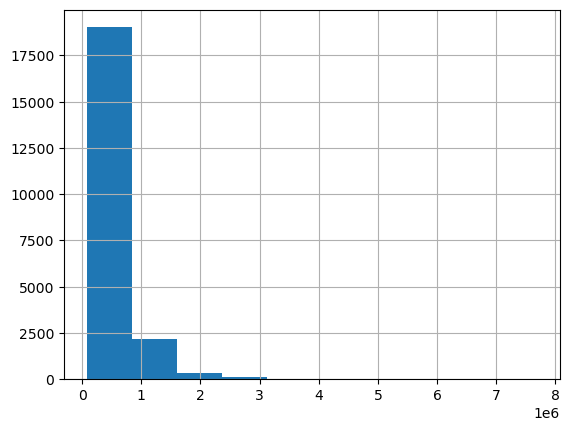

In [216]:
df['price'].hist()
plt.show()

굉장히 치우친 분포를 보입니다. 이걸 위의 변환들을 적용하면 어떻게 변환하는지 해볼까요? (지피티 패기)

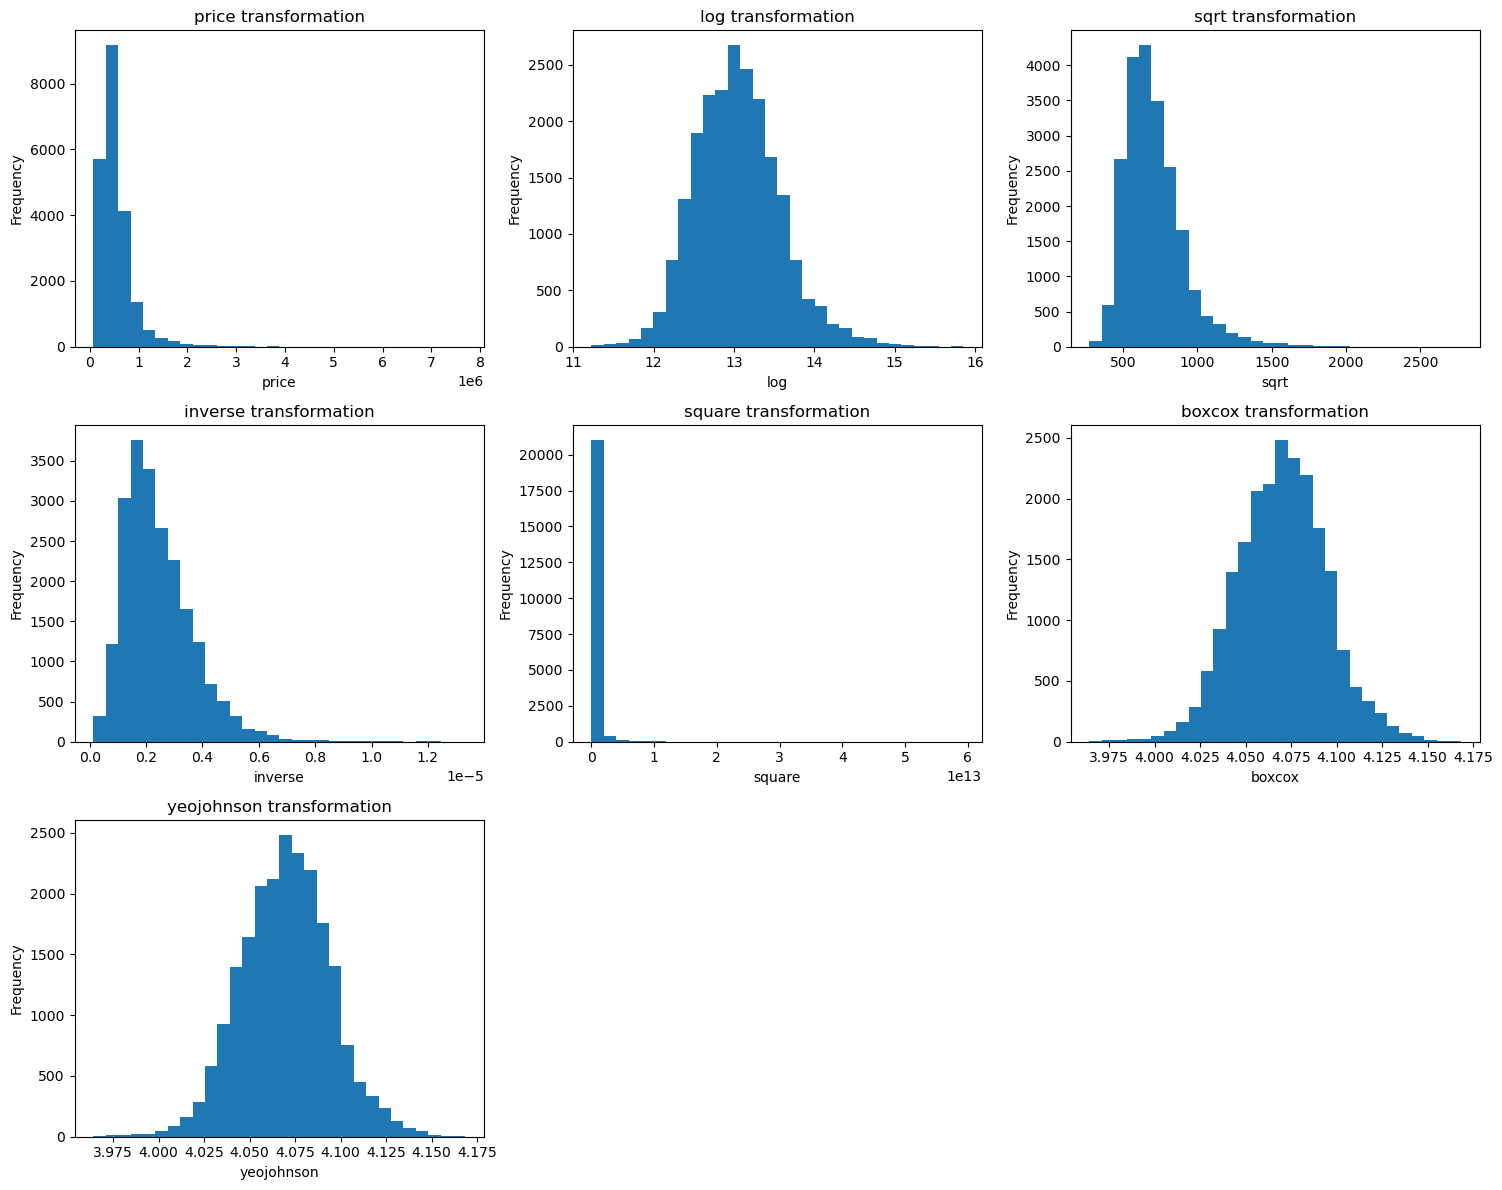

In [218]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import boxcox, yeojohnson

# 각종 변환 적용
dfs = df.copy()
dfs['log'] = np.log(df['price'] + 1)           # 로그 변환 (0 방지)
dfs['sqrt'] = np.sqrt(df['price'])             # 제곱근 변환
dfs['inverse'] = 1 / (df['price'] + 1)         # 역수 변환 (0 방지)
dfs['square'] = df['price'] ** 2               # 제곱 (음의 왜도 교정용)
dfs['boxcox'], _ = boxcox(df['price'] + 1)     # Box-Cox 변환 (양수만 가능)
dfs['yeojohnson'], _ = yeojohnson(df['price']) # Yeo-Johnson 변환 (음수도 가능)

# 변환 리스트
transformations = ['price', 'log', 'sqrt', 'inverse', 'square', 'boxcox', 'yeojohnson']

fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.flatten()

# 그래프 출력
for i, col in enumerate(transformations):
    axes[i].hist(dfs[col], bins=30)
    axes[i].set_title(f'{col} transformation')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')
    axes[i].grid(False)

# 남은 빈 subplot 제거 (총 9칸 중 7개만 사용)
for j in range(len(transformations), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

보니까 box-cox와 yeo-joshnson이 가장 정규분포에 가까워보이긴 하나,

log도 나쁘지 않은걸 알 수 있었다! 이제 다시 자료를 따라 로그 변환을 해서 해보겠다

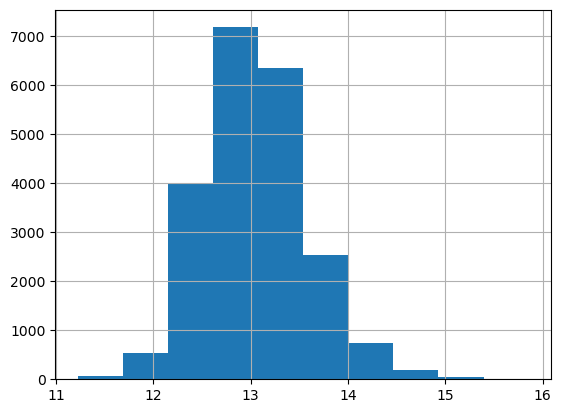

0.42807247557592526

In [220]:
np.log(df['price']).hist()
plt.show()
np.log(df['price']).skew()

0.5 아래로 괜찮게 나온걸 확인할 수 있다

이제 object 타입과 int64, float64 타입을 분류해서 살펴본다

In [222]:
def separate_dtype(DataFrame:df):
    df_obj = df.select_dtypes(include=['object'])
    df_numr = df.select_dtypes(include=['int64', 'float64'])
    return [df_obj, df_numr]

(df_obj, df_numr) = separate_dtype(df)

In [223]:
df_numr.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
2,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
3,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
4,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
5,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [224]:
df_obj.head()

,date
1,20141013T000000
2,20141209T000000
3,20150225T000000
4,20141209T000000
5,20150218T000000


object 타입 자료는 전처리가 필요한 것을 알 수 있다! 구매 일자에 대한 정보를 담고 있어, 앞의 4자리만 추출해 int64타입으로 변환하고 칼럼명을 data2로 저장한다

In [226]:
df_obj['date2'] = df_obj['date'].apply(lambda x: x[0:4])
df['date2'] = df_obj['date2'].astype('int64')
df['date2']

1        2014
2        2014
3        2015
4        2014
5        2015
         ... 
21609    2014
21610    2015
21611    2014
21612    2015
21613    2014
Name: date2, Length: 21613, dtype: int64

In [227]:
#date2와 yr_built의 기간차이를 비교해 sold-built_years라는 새로운 변수를 추가

df['sold-built_years'] = df.apply(lambda x:((x['date2']) - (x['yr_built'])), axis=1)
df['sold-built_years']

1        59
2        63
3        82
4        49
5        28
         ..
21609     5
21610     1
21611     5
21612    11
21613     6
Name: sold-built_years, Length: 21613, dtype: int64

이제 데이터의 전체적인 파악 및 전처리가 완료되었고, 시각화를 통해 특징을 살펴보자

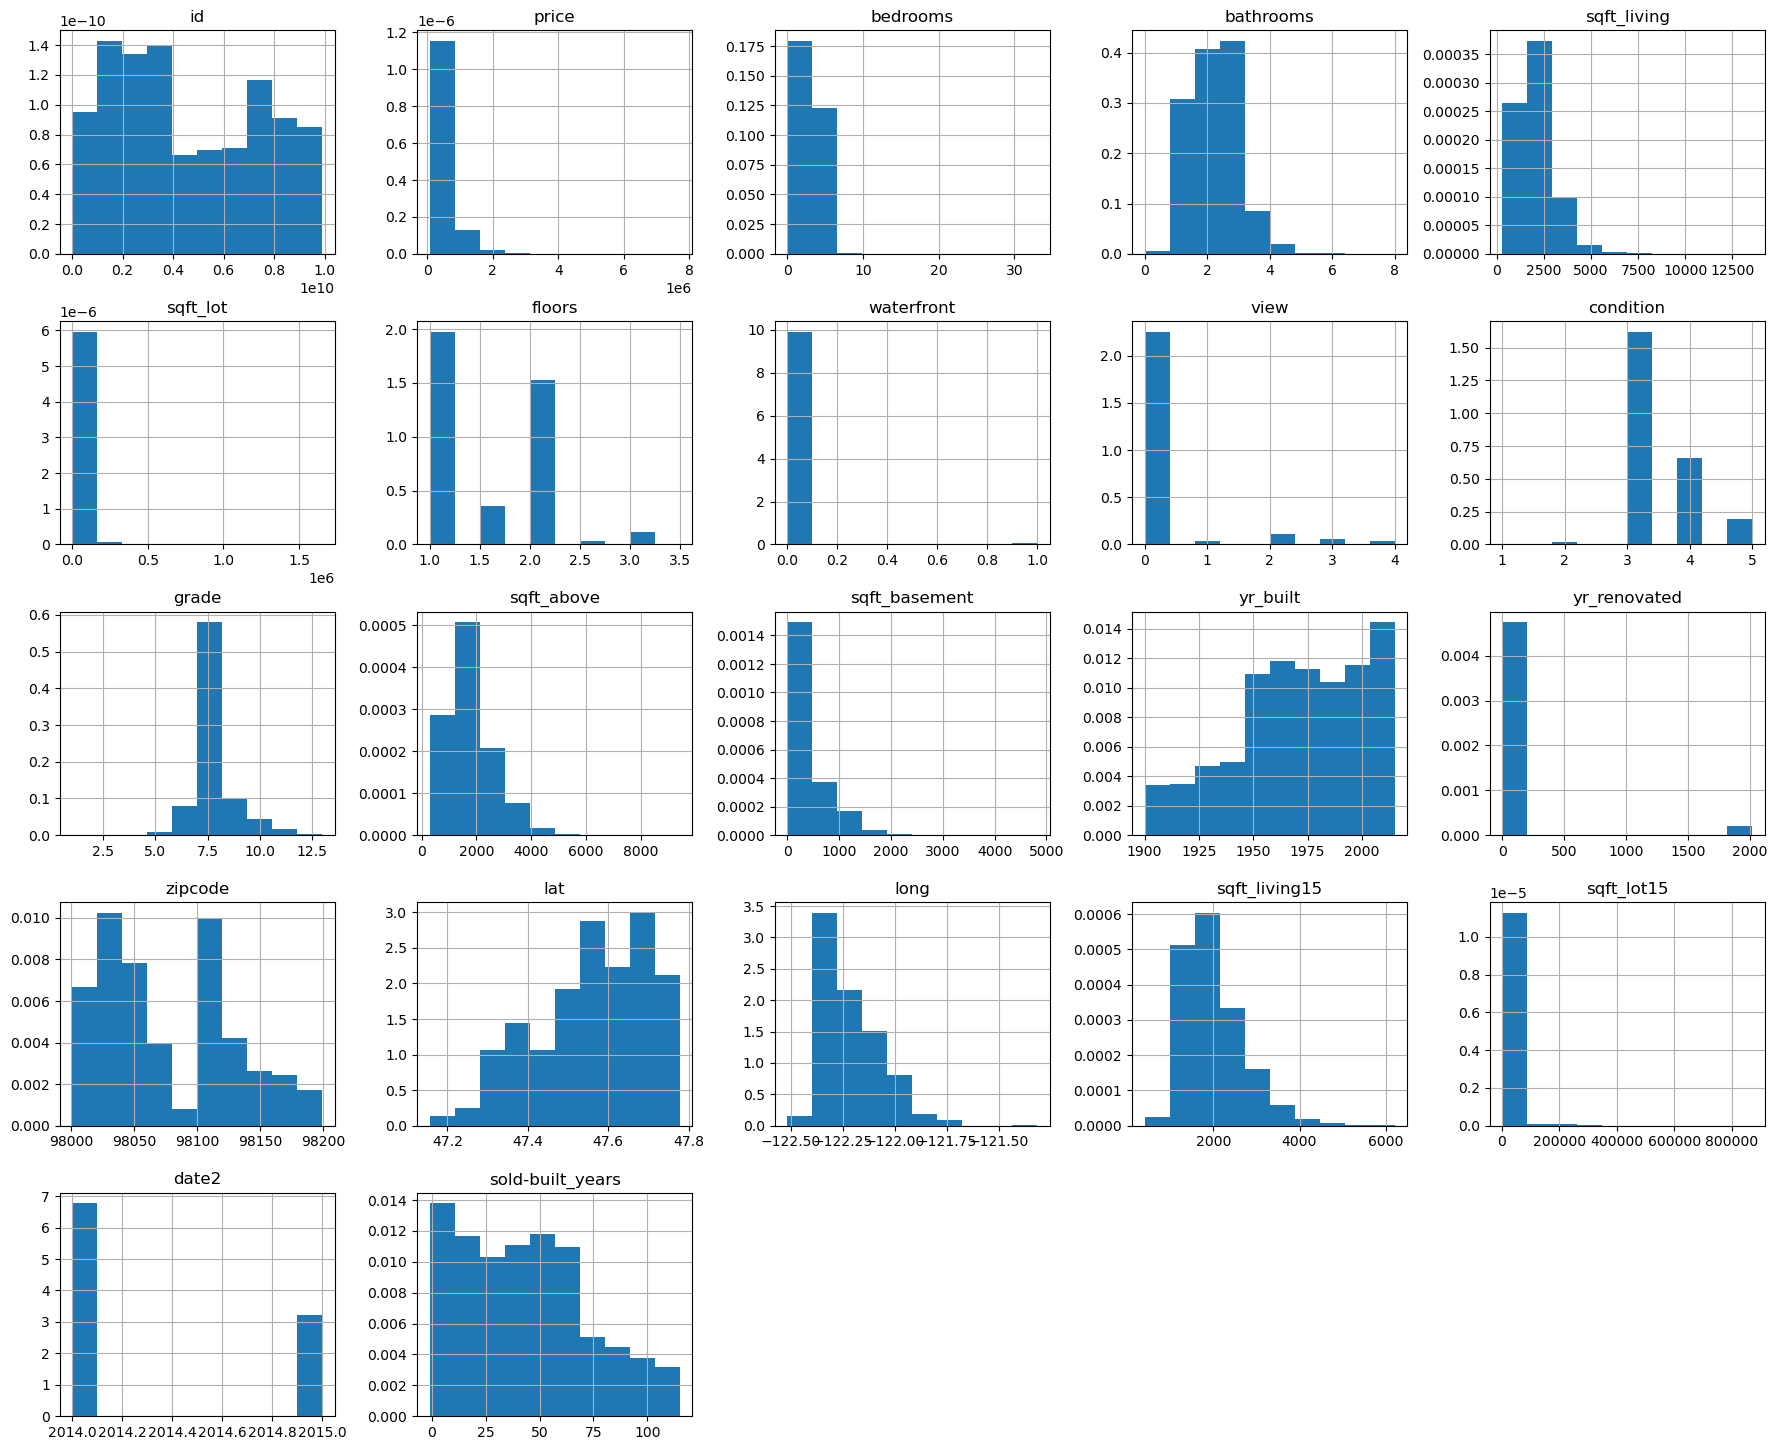

In [229]:
df.hist(figsize=(22,18), density=True)
plt.show()

위의 히스토그램을 통해 각각의 독립변수 데이터의 분포를 확인할 수 있다

종속변수와 선형관계가 있을 것 같은 독립변수들을 선정해야하는데, 이건 어떻게 선정하는지, 저 위의 히스토그램을 보고 판단하는 것인지가 궁금해서 좀 알아봤다

1차적으로 산점도 그래프를 돌릴 변수 선정 자체는 분석가의 도메인지식을 바탕으로 선정을 해서 돌리는 것이라고 한다.

그 후 산점도 그래프를 보고 후보를 물색하는 절차를 수행한다고 한다.

독립변수 중에 종속변수와 관련있어 보이는 변수들을 내가 직접 골라보자면 다음과 같다
- bedrooms, bathrooms, sqft_living, sqft_lot,floors, sqft_above, sqft_basement : 공간의 크기
- waterfront : 집의 입지
- date2 : 판매 일자, 경기에 따라 다를 수 있겠다
- condition, grade, yr_built, yr_renovated : 집의 상태와 관련된 부분

lat, long 변수는 위도 경도, 즉 위치를 나타내는 자료이지만, 선형회귀분석에선 의미가 없을 것으로 판단한다
- 위도, 경도의 선형적 변화로 인해 집의 가격이 달라지진 않을 것으로 보임.

그래서 나는 자료와 달리 내가 선정한 변수들로 산점도를 찍어보겠다.

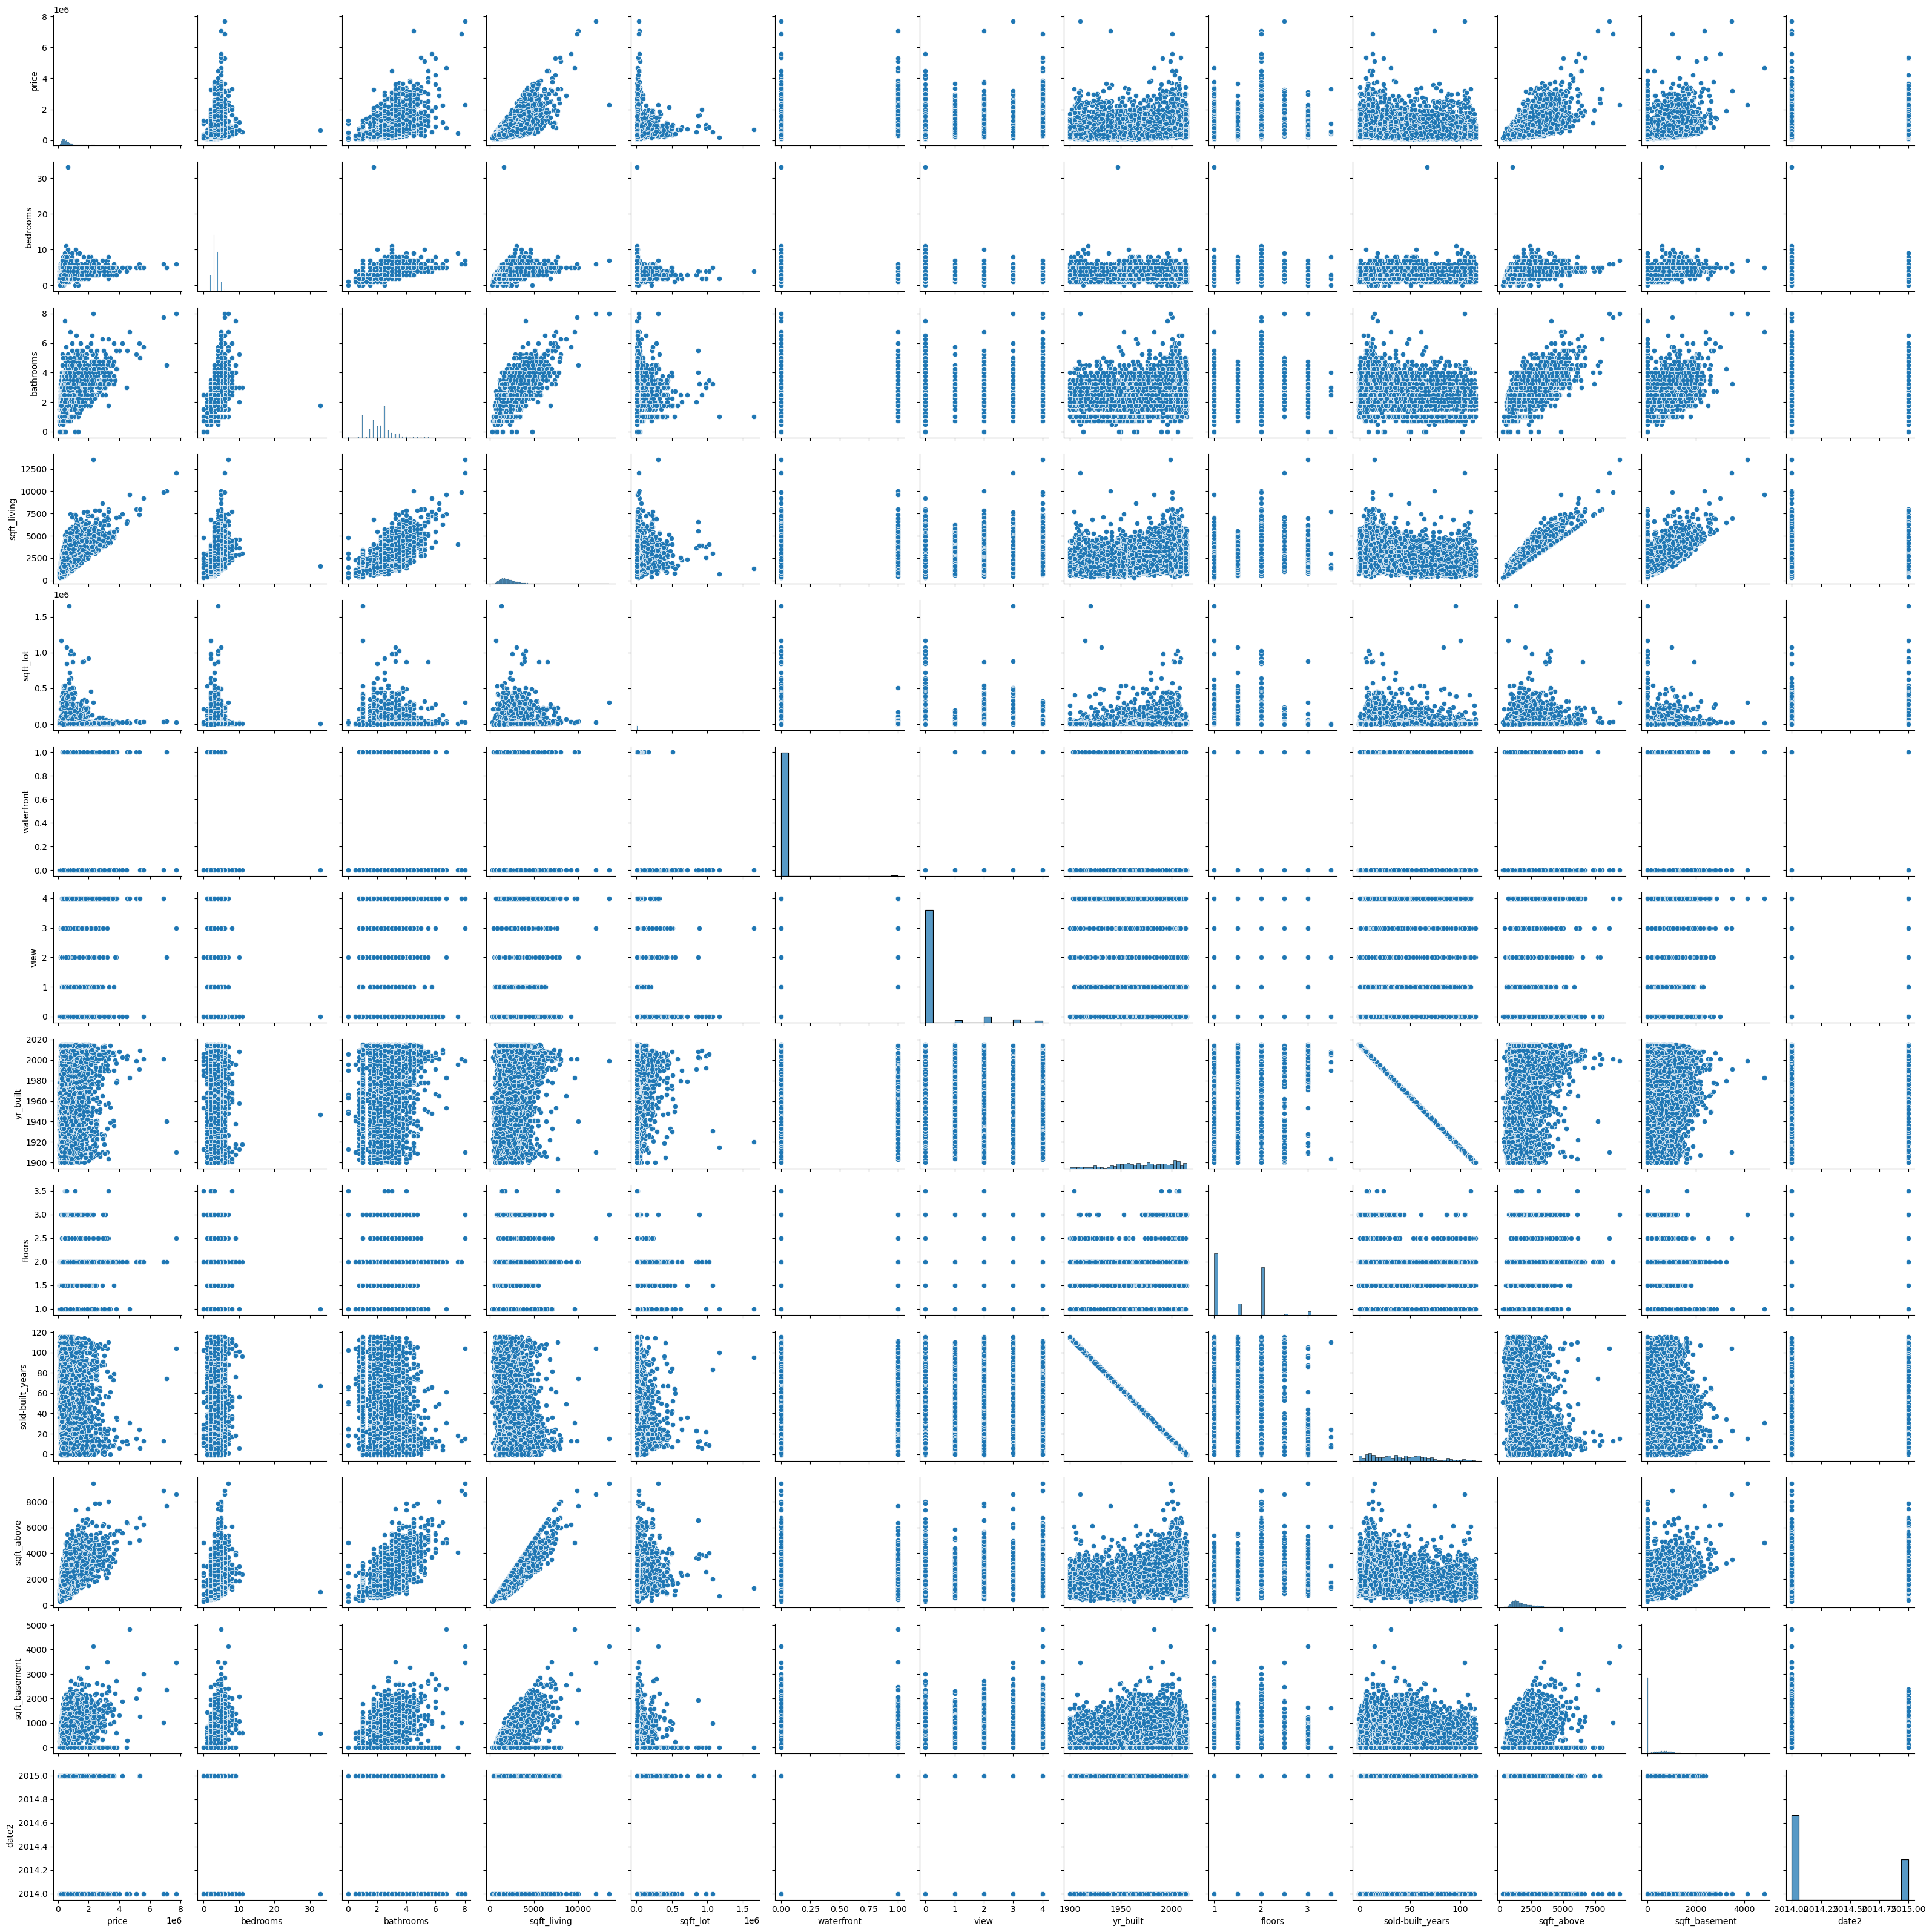

In [231]:
columns = ['price','bedrooms','bathrooms', 'sqft_living','sqft_lot', 'waterfront','view','yr_built', 'floors', 'sold-built_years','sqft_above', 'sqft_basement', 'date2']


df_pairplot = df[columns]
sns.pairplot(df_pairplot)
plt.show()

찍은 산점도를 봤을때, price와 sqft_living, sqft_above가 선형관계가 보이는 편이고, sqft_bathroom도 어느 정도는 관계가 있어 보인다. 

다만 세 변수 모두, 집의 크기와 관련된 변수로서, 다중공산성이 높을 가능성이 있으니, 추가적인 분석을 요할 것 같다

이제 독립변수 간의 상관관계를 확인해보면



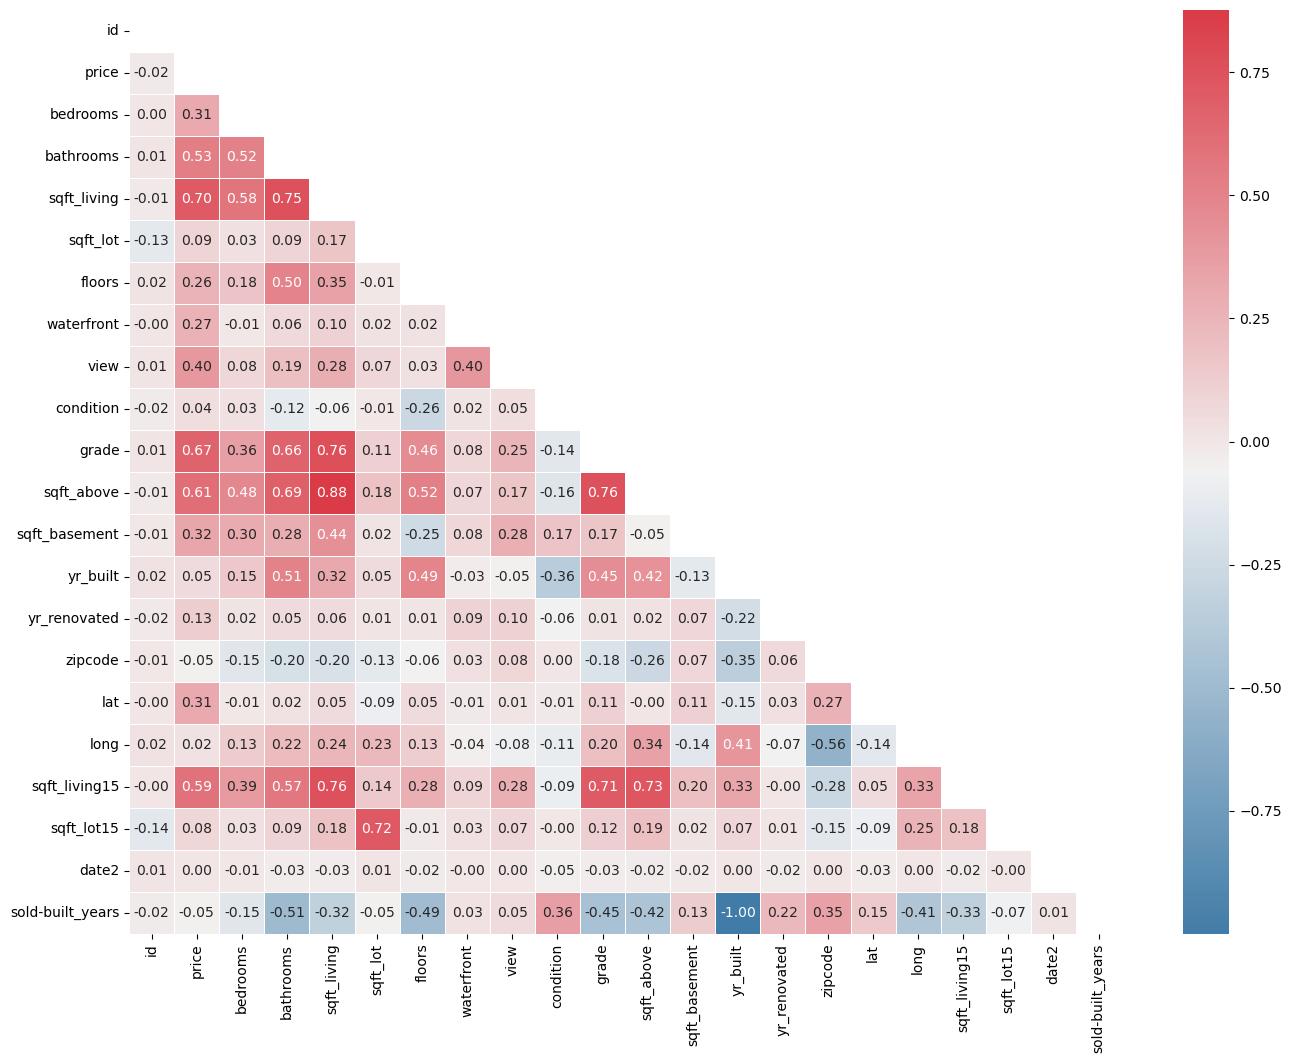

In [249]:
df_corr = df.drop(columns=['date']).corr() #date 칼럼은 object 타입이라 제외시켜요
cmap = sns.diverging_palette(240,10, n=9, as_cmap=True) # 히트맵 색상 팔레트를 정의하는 코드, 빨간색과 파란색으로 변화하는 팔레트

mask = np.zeros_like(df_corr, dtype=bool) 
mask[np.triu_indices_from(mask)] = True #히트맵 모양을 하삼각형으 지정, 위의 코드와 함꼐 상삼각을 안보이게 가리는 코드

plt.figure(figsize=(16,12))

sns.heatmap(df_corr, annot=True, mask=mask, cmap=cmap, linewidths=.5, fmt='.2f', annot_kws={'size':10})
plt.show()


이제 종속변수인 price와 상관관계가 높은 변수들만 정렬을 이용해 추릴 것이다.

In [256]:
df_corr.sort_values(by='price', ascending=False)[['price']]

,price
price,1.000000
sqft_living,0.702035
grade,0.667434
sqft_above,0.605567
sqft_living15,0.585379
bathrooms,0.525138
view,0.397293
sqft_basement,0.323816
bedrooms,0.308350
lat,0.307003


상관관계를 확인했을 떄, sqft_living, sqft_above, sqft_living15, bathrooms 변수들이 상관관계가 높게 나왔다. 

grade 변수의 경우 최종적으로 결정되는 등급이기 때문에, 등급으로 가격을 예측하기는 무의미할 수 있기 때문에 제외했다

위 녀석들의 데이터분포를 살펴보겠다


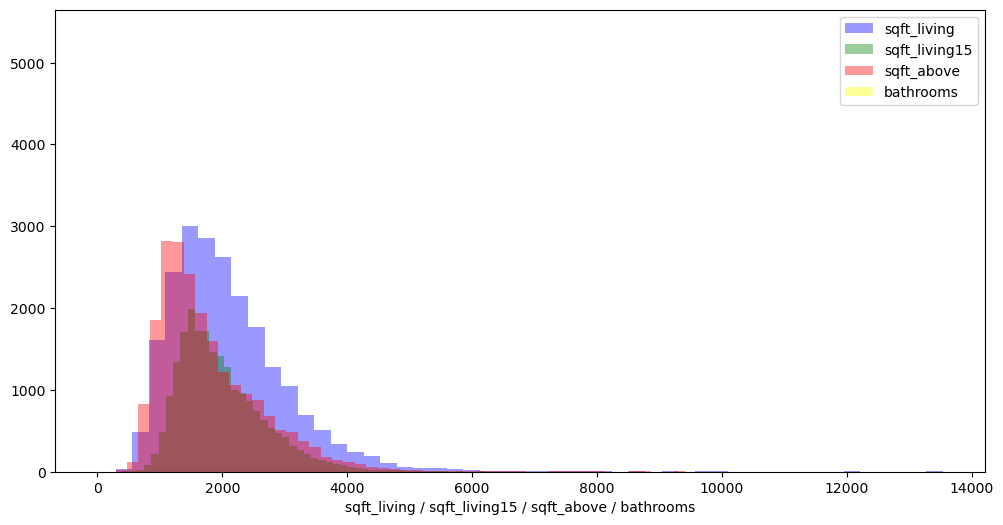

In [264]:
columns = ['sqft_living', 'sqft_living15', 'sqft_above', 'bathrooms']
colors = ['blue','green','red', 'yellow']

living = df[columns]

plt.figure(figsize=(12,6))

for i in range(4):
    ax = sns.distplot(df[columns[i]], hist=True, norm_hist=False, kde=False, label=columns[i], color=colors[i])
ax.set(xlabel="sqft_living / sqft_living15 / sqft_above / bathrooms")

plt.legend()
plt.show()

분포가 상당히 유사함을 알 수 있다. 사실 그럴 수 밖에 없는게, 집의 크기를 의미하는 변수와, 집의 크기에 따라 달라질 요소들(화장실 개수, 지하실 제외 공간 크기 등)의 변수들이기 때문이다. 아마 높은 확률로 다중공산성이 있을 거 같은데, 이러면 가장 상관관계가 높은 걸로 골라서 분석을 실시한다.

그럼 다른 변수들을 제외하고서, 가장 상관관계가 높게 나온 sqft_living 하나로 단순 선형 회귀분석을 실시해보자

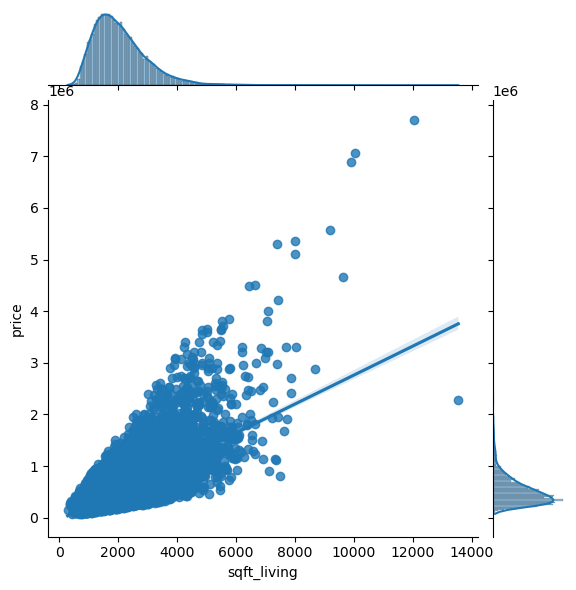

In [270]:
sns.jointplot(x='sqft_living', y='price', data=df, kind='reg')
plt.show()

In [272]:
#상수항을 추가해서 회귀분석을 실시함

X = df[['sqft_living']]
y = df[['price']]

X = sm.add_constant(X, has_constant='add')
X.head()

,const,sqft_living
1,1.0,1180
2,1.0,2570
3,1.0,770
4,1.0,1960
5,1.0,1680


fit()함수를 통해 선형 모델에 적용한 후 해당 결과를 result_model에 저장하고 결과를 확인함

In [275]:
model = sm.OLS(y, X)
result_model = model.fit()
result_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.100e+04
Date:                Sat, 29 Mar 2025   Prob (F-statistic):               0.00
Time:                        23:32:46   Log-Likelihood:            -3.0027e+05
No. Observations:               21613   AIC:                         6.005e+05
Df Residuals:                   21611   BIC:                         6.006e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.358e+04   4402.690     -9.899      0.000   -5.22e+04    -3.5e+04
sqft_living   280.6236      1.936    144.920      0.000     276.828     284.419
==============================================================================
Omnibus:                    14832.490   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           546444.713
Skew:                           2.824   Prob(JB):                         0.00
Kurtosis:                      26.977   Cond. No.                     5.63e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

위 summary()를 통해 출력된 결과에서 확실히 기억해야 할 것들을 추려보면

R-squared - 결정계수(모델의 설명력), Adj. R-squared - 조정된 결정계수(변수 증가로 인한 결정계수 증가를 보정함), F-statistic - F값, Prob (F-statistic) - F값의 p값, 나중에 다중 선형 회귀 모델에서 전체 모델의 유의미성 검증할 때 사용, P>|t| - p-value

sqft_living의 P>|t| 값이 0.05보다 작으므로, 귀무가설 기각시킴 -> 모형의 통계학적 유의성이 확보된다.

이제 실제값과 예측값의 차이를 나타내는 잔차를 확인해보자.

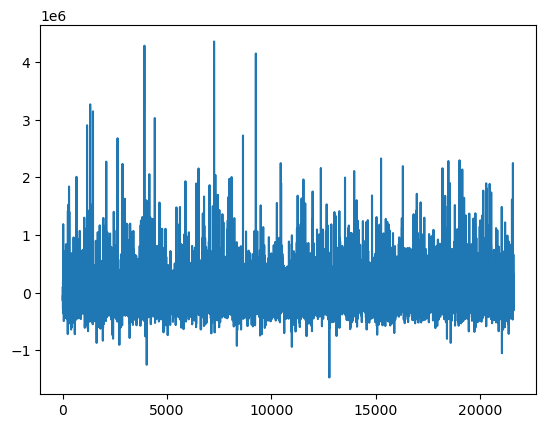

6.73423828070638e-10

In [281]:
# 잔차를 확인합니다
result_model.resid.plot()
plt.show()

result_model.resid.mean()

시각화를 통해 봤을 때 전체적으로 0에 가까우나, 양수쪽으로 치우친 것 같았다.

그래서 혹시 몰라 잔차의 평균을 계산해서 확인해봤다

확인 결과 0에 가까운 매우 작은 수치가 나와서 모델에 문제가 없음을 확인했다

<h3>2. 다중 선형 회귀</h3>

위의 모델에서 설명 변수를 추가한 모델을 제작한다. 특히 범주형 변수를 포함한 회귀 모형도 다룬단다!!

- 1차적으로 id를 제외한 모든 독립변수를 사용해 다중 선형 회귀 분석을 실시(date도 이미 전처리 해서 ㄱㅊ)
- 선별한 독립변수들로 다시 다중 선형 회귀 분석을 한다


In [291]:
columns = list(df.columns)
not_used = ['id', 'date']

for item in not_used :
    columns.remove(item)

df_reg =df[columns]

df_kc_reg = sm.add_constant(df_reg, has_constant='add')
feature_columns = list(df_kc_reg.columns.difference(['price']))

X = df_kc_reg[feature_columns]
y = df_kc_reg.price

multi_linear_model = sm.OLS(y, X)
result_model_1 = multi_linear_model.fit()

result_model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.701
Model:                            OLS   Adj. R-squared:                  0.701
Method:                 Least Squares   F-statistic:                     2816.
Date:                Sun, 30 Mar 2025   Prob (F-statistic):               0.00
Time:                        00:01:39   Log-Likelihood:            -2.9455e+05
No. Observations:               21613   AIC:                         5.891e+05
Df Residuals:                   21594   BIC:                         5.893e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
bathrooms         4.125e+04   3245.693     12.710      0.000    3.49e+04    4.76e+04
bedrooms         -3.598e+04   1887.302    -19.064      0.000   -3.97e+04   -3.23e+04
condition         2.767e+04   2348.964     11.781      0.000    2.31e+04    3.23e+04
const             -5.46e+07   6.59e+06     -8.282      0.000   -6.75e+07   -4.17e+07
date2             1.938e+04   1952.649      9.926      0.000    1.56e+04    2.32e+04
floors            7322.7479   3587.535      2.041      0.041     290.915    1.44e+04
grade              9.61e+04   2147.594     44.750      0.000    9.19e+04       1e+05
lat               6.053e+05   1.07e+04     56.511      0.000    5.84e+05    6.26e+05
long             -2.147e+05   1.31e+04    -16.387      0.000    -2.4e+05   -1.89e+05
sold-built_years    1.1e+04    976.502     11.265      0.000    9086.336    1.29e+04
sqft_above          70.7487      2.248     31.475      0.000      66.343      75.155
sqft_basement       39.8280      2.640     15.086      0.000      34.653      45.003
sqft_living        110.6331      2.264     48.865      0.000     106.195     115.071
sqft_living15       21.7694      3.439      6.330      0.000      15.028      28.511
sqft_lot             0.1249      0.048      2.612      0.009       0.031       0.219
sqft_lot15          -0.3794      0.073     -5.191      0.000      -0.523      -0.236
view              5.251e+04   2135.068     24.596      0.000    4.83e+04    5.67e+04
waterfront        5.837e+05   1.73e+04     33.705      0.000     5.5e+05    6.18e+05
yr_built          8381.0941    977.491      8.574      0.000    6465.139    1.03e+04
yr_renovated        20.7777      3.648      5.696      0.000      13.628      27.928
zipcode           -582.8028     32.905    -17.712      0.000    -647.298    -518.307
==============================================================================
Omnibus:                    18432.447   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1903378.131
Skew:                           3.576   Prob(JB):                         0.00
Kurtosis:                      48.414   Cond. No.                     4.98e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.83e-20. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

결정계수값이 0.701로 꽤 높고, 모든 변수의 p값이 유의수준보다 훨씬 작아 모형이 통계학적으로 유의성을 보인다.

하지만 모든 설명변수가 집값 예측에 유의하다는 결과는 납득하기 어려운게, 우편주소나 위도 경도 등의 변수도 유의하다는 게 이상했다.

그럼 그렇지, 자료에서도 다중공산성 체크를 하니까 바로 다중공산성으로 인한 문제가 발생한 것을 확인할 수 있었다.



In [303]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

df_vif = pd.DataFrame()
df_vif['VIF'] = np.round([variance_inflation_factor(df_reg.values, i) for i in range(df_reg.shape[1])],2)

df_vif['features'] = df_reg.columns
df_vif.sort_values(by='VIF', ascending=False)

,VIF,features
10,inf,sqft_above
11,inf,sqft_basement
19,inf,date2
12,inf,yr_built
20,inf,sold-built_years
3,inf,sqft_living
14,4922845.94,zipcode
16,1388182.32,long
15,159610.79,lat
9,162.17,grade


정말 어마어마란 vif가 보인다. 위의 6개는 무한대를 의미하는 inf로, 그 아래는 492만이라는 아찔한 숫자가 나왔다. 역시 다중공산성으로 인한 문제가 발생했음을 알 수 있다.

다음 독립 변수들을 선택해서 다중 선형 회귀분석을 실시해보자.

또한, 반응 변수(price)에 자연로그를 취해 비대칭인 데이터의 분포를 완화한 상태에서 회귀분석을 한다.

bedrooms(연속형)
sqrt_living(연속형)
waterfront(범주형)
view(범주형)
sold-built_years : date - yr_built (연속형)

In [308]:
df_reg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 1 to 21613
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             21613 non-null  float64
 1   bedrooms          21613 non-null  int64  
 2   bathrooms         21613 non-null  float64
 3   sqft_living       21613 non-null  int64  
 4   sqft_lot          21613 non-null  int64  
 5   floors            21613 non-null  float64
 6   waterfront        21613 non-null  int64  
 7   view              21613 non-null  int64  
 8   condition         21613 non-null  int64  
 9   grade             21613 non-null  int64  
 10  sqft_above        21613 non-null  int64  
 11  sqft_basement     21613 non-null  int64  
 12  yr_built          21613 non-null  int64  
 13  yr_renovated      21613 non-null  int64  
 14  zipcode           21613 non-null  int64  
 15  lat               21613 non-null  float64
 16  long              21613 non-null  float6

In [316]:
df_reg = df[['bedrooms','sqft_living','waterfront','view','sold-built_years','price']]

df_kc_reg = sm.add_constant(df_reg, has_constant='add')
feature_columns = list(df_kc_reg.columns.difference(['price']))

X = df_kc_reg[feature_columns]
y = np.log(df_kc_reg.price)

muliti_linear_model = sm.OLS(y, X)
result_model_2 = multi_linear_model.fit()
result_model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.529
Model:                            OLS   Adj. R-squared:                  0.529
Method:                 Least Squares   F-statistic:                     4852.
Date:                Sun, 30 Mar 2025   Prob (F-statistic):               0.00
Time:                        00:19:43   Log-Likelihood:                -8675.5
No. Observations:               21613   AIC:                         1.736e+04
Df Residuals:                   21607   BIC:                         1.741e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
bedrooms            -0.0413      0.003    -12.647      0.000      -0.048      -0.035
const               12.1722      0.011   1128.098      0.000      12.151      12.193
sold-built_years     0.0025   8.96e-05     27.564      0.000       0.002       0.003
sqft_living          0.0004   3.62e-06    117.929      0.000       0.000       0.000
view                 0.0785      0.004     21.269      0.000       0.071       0.086
waterfront           0.2885      0.031      9.285      0.000       0.228       0.349
==============================================================================
Omnibus:                      190.066   Durbin-Watson:                   1.956
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              215.753
Skew:                          -0.183   Prob(JB):                     1.41e-47
Kurtosis:                       3.325   Cond. No.                     2.88e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.88e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

p값이 유의수준보다 훨씬 작은 모델이 나왔다. 이번에 vif검사를 돌려봐야지

In [319]:
df_vif = pd.DataFrame()
df_vif['VIF'] = np.round([variance_inflation_factor(df_reg.values, i) for i in range(df_reg.shape[1])], 2)

df_vif["features"] = df_reg.columns
df_vif.sort_values(by='VIF', ascending=False)

,VIF,features
1,19.32,sqft_living
0,14.17,bedrooms
5,7.56,price
4,2.85,sold-built_years
3,1.48,view
2,1.24,waterfront


아까보다 훨씬 공산성 문제가 줄어든 것을 알 수 있다. 

근데 보다보니까 vif 검사인데 종속변수인 price가 검사 대상으로 들어가있는 부분을 확인, 종속변수는 다중공산성 검사의 대상이 아니라고 판단해 제외하고 다시 돌려보겠다.

In [330]:
df_vif = pd.DataFrame()
df_vif['VIF'] = np.round([variance_inflation_factor(X.values, i) for i in range(X.shape[1])], 2)
df_vif["features"] = X.columns

df_vif.sort_values(by='VIF', ascending=False, inplace=True)
df_vif

,VIF,features
1,19.25,const
3,1.82,sqft_living
0,1.52,bedrooms
4,1.32,view
5,1.20,waterfront
2,1.15,sold-built_years


확실히 기존의 검사에서는 종속변수가 다중공산성 검사에 들어가 있어 결과가 왜곡되었던 것을 알 수 있다.

특히 위에서 단순 선형 회귀분석에서도 쓸 정도로 관계가 깊었던 sqft_living 변수의 공산성이 높던 이유도, price 변수가 포함된 검사라 그랬음을 알 수 있었다.

<h3>3. 회귀모형의 가정 진단</h3>

회귀모형은 종속변수와 독립변수의 선형관계 뿐 만 아니라, 오차의 독립성, 정규성 등분산성 가정 등을 전제로 한다

이를 고전적 가정이라고 하는데, 고전적 가정이 만족되어야, 일반적인 경우로 유의한 회귀모델을 만들 수 있다.

검정을 시작해보자.

선형성 검정
-

대각선을 따라 우상향하는 모습을 보임, 선형성 만족

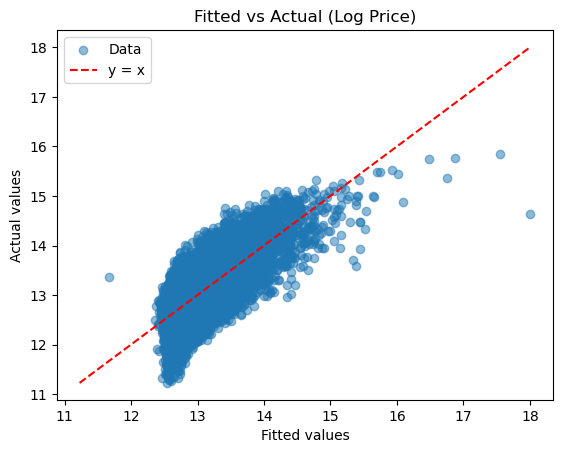

In [336]:
import matplotlib.pyplot as plt

fitted = result_model_2.fittedvalues

plt.scatter(fitted, y, alpha=0.5, label='Data')

min_val = min(fitted.min(), y.min())
max_val = max(fitted.max(), y.max())
plt.plot([min_val, max_val], [min_val, max_val], color='r', ls='--', label='y = x')

plt.xlabel('Fitted values')
plt.ylabel('Actual values')
plt.title('Fitted vs Actual (Log Price)')
plt.legend()
plt.show()

정규성 검정
-

H0은 정규분포를 따른다
- (정규성 검정에서는 가설검정과 다르게, 우리가 검증하길 원하는 목표인 정규성 만족이 영가설임, 아마 정규분포인게 더 당연한 케이스이고, 정규분포를 따르지 않는게 더 희소한 케이스여서 그런게 아닐까 싶음)

H1은 정규분포를 따르지 않는다.

p값이 0.05 이하이므로 귀무가설을 기각해야하나... 관측치의 개수가 매우 많으므로 Q-Q플롯을 같이 보면서 판단해야하고, 판단 결과 직선과 대체로 일치함 -> 정규성 만족한다고 봐도 된다.

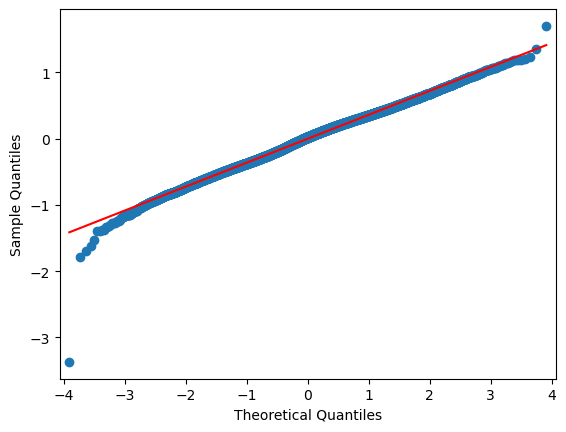

In [339]:
aaplot = sm.qqplot(result_model_2.resid, line='s')
plt.show()

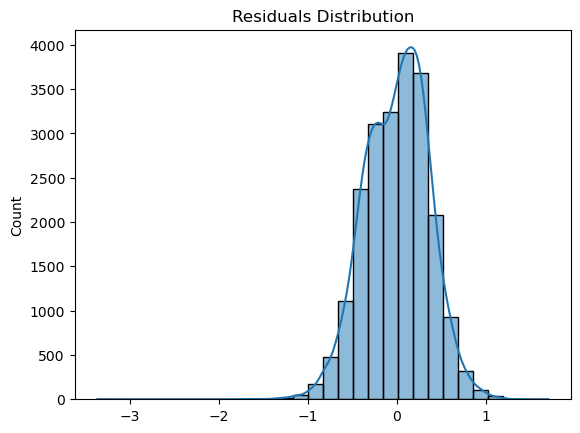

In [347]:
resid = result_model_2.resid
sns.histplot(resid, kde=True, bins=30)
plt.title('Residuals Distribution')
plt.show()

In [ ]:
정규성 검정
-

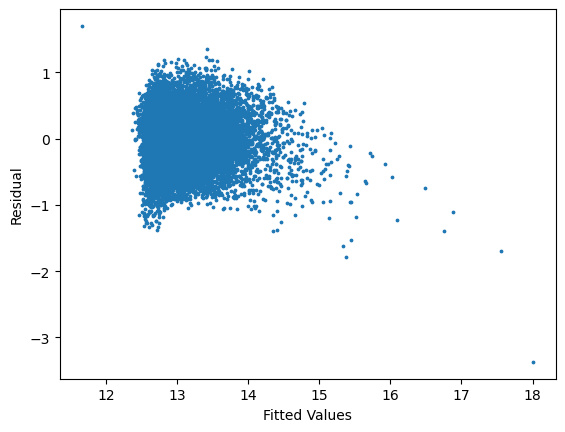

In [351]:
fitted = result_model_2.predict()

resid = result_model_2.resid
pred = result_model_2.predict(X)

fig = plt.scatter(pred, resid, s=3)

plt.xlabel('Fitted Values')
plt.ylabel('Residual')
plt.show()

In [357]:
result_shapiro = stats.shapiro(result_model_2.resid)

print(f'F value : {result_shapiro[0]:.4f} / p-value : {result_shapiro[1]:.4f}')

if result_shapiro[1]<0.05:
    print('p-value < 0.05')

print('\n')
print(f"관측치는: {len(result_model_2.resid)}")

F value : 0.9959 / p-value : 0.0000
p-value < 0.05


관측치는: 21613


독립성 검정
-

아까 체크했던 다중공산성 체크임!


오차항의 자기상관 검정
-
    
시각화를 통해서도, 자기상관이 거의 0에 가까움을 확인할 수 있다

DW검사 결과도 1.956으로 거의 2에 근접하면서 오차항이 자기상관되어있지 않음을 알 수 있다.


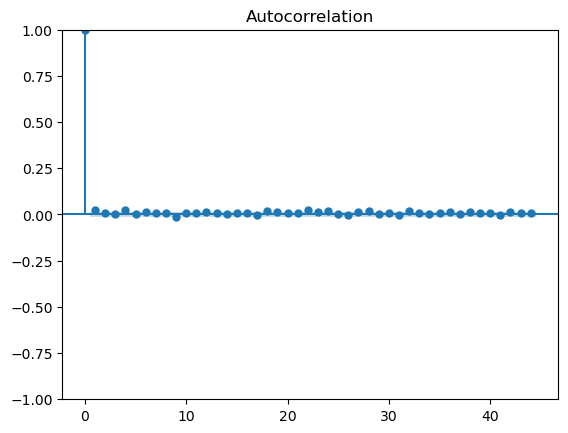

In [362]:
sm.graphics.tsa.plot_acf(result_model_2.resid)
plt.show()

In [364]:
from statsmodels.stats.stattools import durbin_watson

dw_stat = durbin_watson(result_model_2.resid)
print(f'Durbin-Watson stat: {dw_stat:.3f}')

Durbin-Watson stat: 1.956


등분산성
-




등분산성
-
전차의 분포가 0에 가까운 정규분포에 가까운 모습을 볼 수 있다.

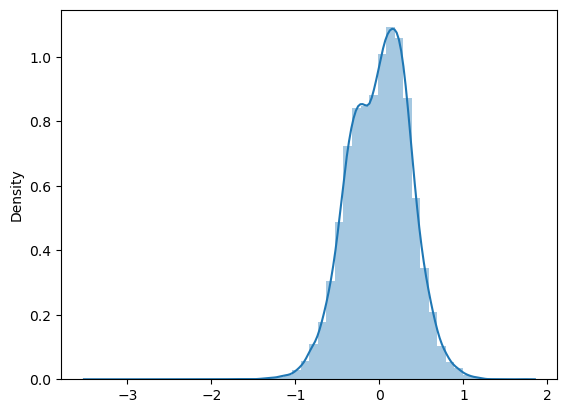

In [369]:
sns.distplot(result_model_2.resid)
plt.show()

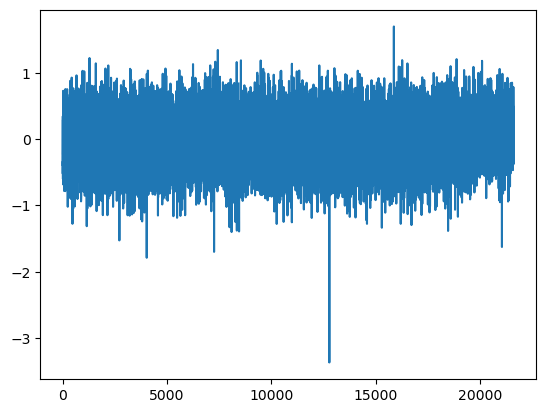

In [371]:
result_model_2.resid.plot()
plt.show()

잔차의 평균이 0인가?
-
0에 가깝다고 볼 수 있다

In [377]:
print(np.mean(result_model_2.resid))

1.7151896070657383e-11


기본 가정을 전부 만족하니까 예측하기 적당하다. 다중공산성이 높은 문제는 종속변수인 price를 제거함으로써 달성했다고 생각한다.